To run this notebook, click "Runtime" -> "Run All" on the top menu bar.

# Word Clouds and Other Visualizations for Subscription Cancellation Data

To start, we first import the necessary libraries.


In [47]:
import numpy as np
import pandas as pd

from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from google.colab import files

# Directions

This document/tool contains visualizations for subscription cancellations by product.

Running the below cell will prompt you for a file upload. The file should be in the same format as the `subscription_cancellations.csv` file shared with our team.

There is also a table of contents on the left sidebar to help with navigation!

In [48]:
uploaded = files.upload()

Saving subscription_cancellations.csv to subscription_cancellations (4).csv


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
import io
sc = pd.read_csv(io.BytesIO(uploaded['subscription_cancellations.csv']))

In [51]:
pd.options.mode.chained_assignment = None 
s_stemmer = SnowballStemmer("english")
stopwords = set(STOPWORDS)

In [52]:
sc.head()

id  ...                       cancellation_reason_comments
0  36179160  ...              I found another product that I prefer
1  36180516  ...                                             thanks
2  36184623  ...                         Not satisfied with product
3  36188379  ...              I don't go through this much product.
4  36225477  ...  Deoderant didn't fit in the plastic holder. Cr...

[5 rows x 5 columns]

# Types of products and corresponding number of cancellations:

We can see that deodorant, mouthwash, and shampoo are the top 3 products with the highest number of cancellations.

In [53]:
df = sc["product_name"].value_counts().to_frame().reset_index().rename(columns = {"index":"Product", "product_name" : "Number of cancellations"})
df.index = np.arange(1, len(df)+1)
df
#Deodorant was cancelled for the most times.

Product  Number of cancellations
1              Deodorant                     3427
2              Mouthwash                     1762
3                Shampoo                      865
4                  Floss                      536
5            Conditioner                      370
6             Toothpaste                      277
7     Hand Sanitizer 8oz                      260
8              Body Wash                      258
9           Cotton Swabs                      147
10             Hand Soap                       65
11        Plastic Offset                       38
12  Hand Sanitizer 2.4oz                       38

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

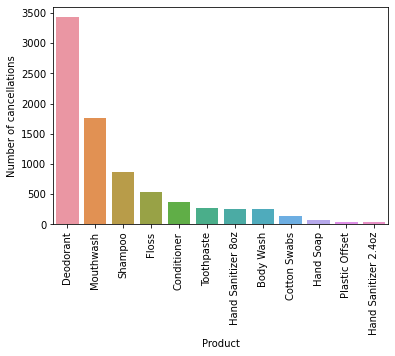

In [82]:
sns.barplot(data = df, x = "Product", y = "Number of cancellations")
plt.xticks(rotation='vertical')

**The following cells are functions to generate the word clouds:**

In [55]:
def make_wordcloud(product):
    sub_df = sc[sc.product_name == product]
    temp = sub_df["cancellation_reason_comments"].str.replace("[^\w\s]", "").str.lower().str.split()
    
    comment_tokens = []
    
    for i in temp:
        try:
            token_list = [s_stemmer.stem(word) for word in i]
        except:
            token_list = []
    
        comment_tokens.append(token_list)
    comment_word_string = " ".join(sum(list(comment_tokens), []))
    
    wordcloud = WordCloud(width = 300, height = 300,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_word_string)
  
    
    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

In [56]:
def make_wordcloud_advance(product, reason):
    product_df = sc[sc.product_name == product]
    sub_df = product_df[product_df.cancellation_reason == reason]
    temp = sub_df["cancellation_reason_comments"].str.replace("[^\w\s]", "").str.lower().str.split()
    
    comment_tokens = []
    
    for i in temp:
        try:
            token_list = [s_stemmer.stem(word) for word in i]
        except:
            token_list = []
    
        comment_tokens.append(token_list)
    comment_word_string = " ".join(sum(list(comment_tokens), []))
    
    wordcloud = WordCloud(width = 300, height = 300,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_word_string)
  
    
    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

In [57]:
def make_wordcloud_advance_2(product, reason, str_contained):
    product_df = sc[sc.product_name == product]
    sub1_df = product_df[product_df.cancellation_reason == reason]
    sub_df = sub1_df[np.array(or_deorder["cancellation_reason_comments"].str.contains(str_contained, na = False))]
    temp = sub_df["cancellation_reason_comments"].str.replace("[^\w\s]", "").str.lower().str.split()
    
    comment_tokens = []
    
    for i in temp:
        try:
            token_list = [s_stemmer.stem(word) for word in i]
        except:
            token_list = []
    
        comment_tokens.append(token_list)
    comment_word_string = " ".join(sum(list(comment_tokens), []))
    
    wordcloud = WordCloud(width = 300, height = 300,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_word_string)
  
    
    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

In [58]:
def top_reasons(product):
    prod = sc[sc["product_name"] == product]
    return prod["cancellation_reason"].value_counts().to_frame().rename(columns = {"index":"Cancellation Reason", "cancellation_reason" : "Number of times"})

# Word Clouds By Product

## Deodorant

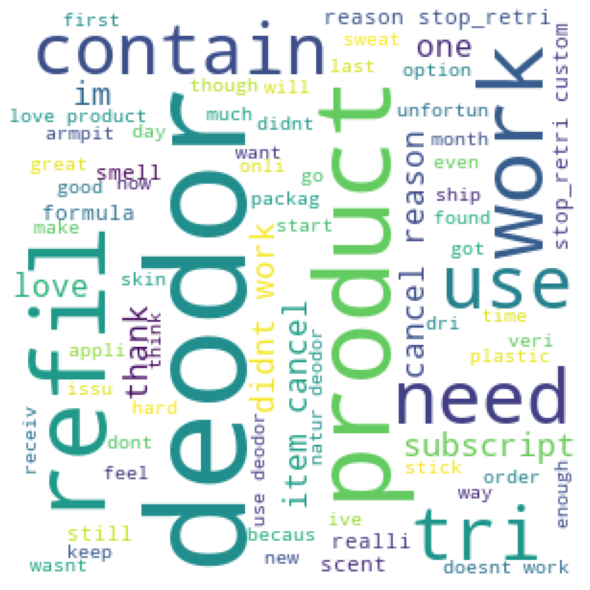

In [59]:
make_wordcloud("Deodorant")

We can see that most people choose "Other reason" as the top reason, which means that we can look further into what are the "Other reasons".

The second and third highest is "The product/formula didn't work for me", so maybe byHumankind can look into improving the formula.


In [60]:
#What are the most common cancellation reason for deodorant
top_reasons("Deodorant")

Number of times
Other reason                                                   1085
The product/formula didn't work for me                          600
The product didn't work for me                                  552
Prefer to order refills as needed (without a su...              224
The container didn't work for me                                211
I'm not ready for my next refill (still have pl...              211
Other                                                           175
The formula didn't work for me                                  160
I didn't like the scent/flavor                                   94
Product wasn't a good value                                      59
Product wasn't a good value                                      29
I no longer use this product                                     18
Just not that into subscriptions                                  4
This is too expensive                                             4
This was created by accident                                      1

Now, we make this word cloud for the comments in "Other reasons", and we can see that "deordor", "product", "refil", and "subscript" are the most common words among those comments.

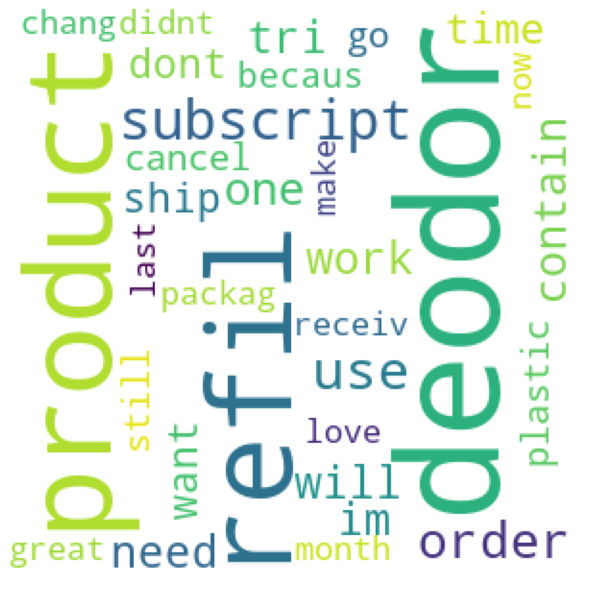

In [61]:
make_wordcloud_advance("Deodorant", "Other reason")

In [62]:
deodorant = sc[sc["product_name"] == "Deodorant"]
or_deorder = deodorant[deodorant["cancellation_reason"] == "Other reason"]
or_deorder[np.array(or_deorder["cancellation_reason_comments"].str.contains("subscript", na = False))]
#It seems like a lot of people have 2 subscriptions (double subscription)

id  ...                       cancellation_reason_comments
61     38922916  ...  I had issues connecting to my account to adjus...
64     39040524  ...  i had to subscriptions, just consolidating int...
125    40538172  ...  I want to order as needed rather than have a m...
145    41535294  ...  The interface to edit the subscription doesn’t...
215    42541846  ...  I have tried to change the frequency to every ...
...         ...  ...                                                ...
7960  131170578  ...          I have two subscriptions for some reason.
7999  133337793  ...           Mistakenly set up too many subscriptions
8043  136788095  ...  I'm pretty sure I was signed up for two subscr...
8071  141482935  ...                      the subscription was doubled.
8085  147000305  ...  Starting up new subscription with correct pref...

[167 rows x 5 columns]

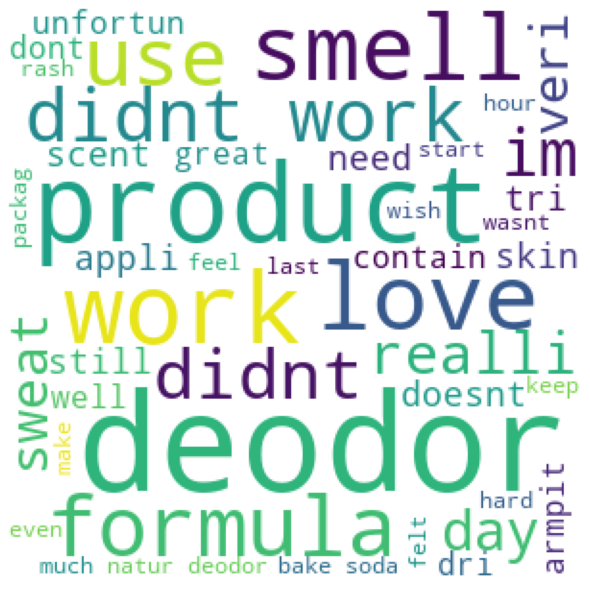

In [63]:
make_wordcloud_advance("Deodorant", "The product/formula didn't work for me")

## Mouthwash

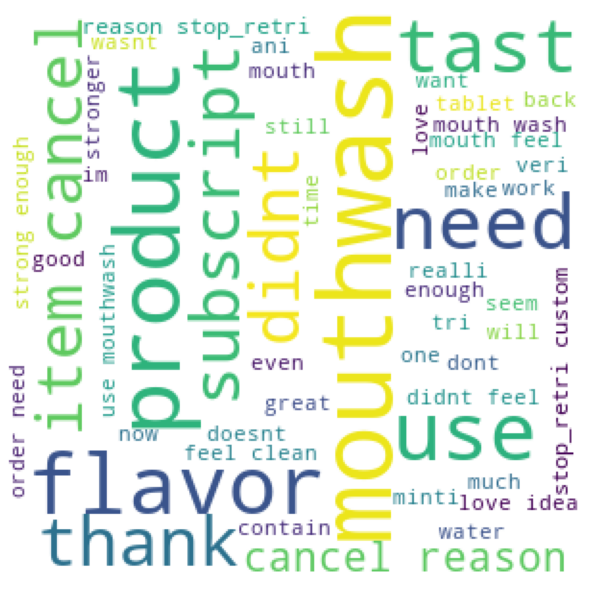

In [64]:
#It seems like the reasons are relating to its flavor and taste.
make_wordcloud("Mouthwash")

In [65]:
#What are the reaons people are canceling mouthwash
top_reasons("Mouthwash")

Number of times
Other reason                                                    498
I didn't like the scent/flavor                                  296
The product/formula didn't work for me                          291
The product didn't work for me                                  178
Prefer to order refills as needed (without a su...              143
I'm not ready for my next refill (still have pl...              119
Other                                                           114
The formula didn't work for me                                   62
Product wasn't a good value                                      31
The container didn't work for me                                  9
I no longer use this product                                      8
Product wasn't a good value                                       8
Just not that into subscriptions                                  2
This is too expensive                                             2
This was created by accident                                      1

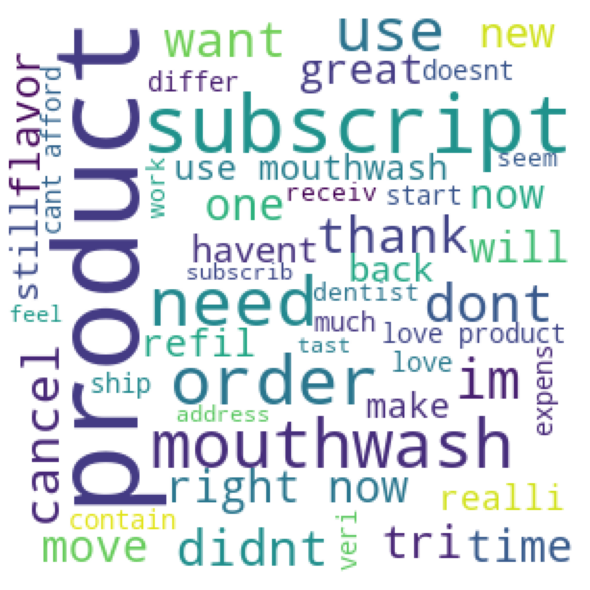

In [66]:
make_wordcloud_advance("Mouthwash", "Other reason")

In [67]:
mouthwash = sc[sc["product_name"] == "Mouthwash"]
or_mw = mouthwash[mouthwash["cancellation_reason"] == "Other reason"]
or_mw[np.array(or_mw["cancellation_reason_comments"].str.contains("subscript", na = False))]
#Can't update/adjust the subscription

id  ...                       cancellation_reason_comments
27     37465146  ...  Tried to adjust subscription but changes weren...
99     40080608  ...  The subscriptions are impossible to edit. Ever...
166    42021818  ...  I still want the product, but also wanted to a...
175    42086379  ...  Really like the product! Just don’t like subsc...
238    43165008  ...  Mouthwash is worthless and has no dentally-ben...
...         ...  ...                                                ...
6695   81527971  ...  wanting to add more products to my regular ord...
6765  119683192  ...  I already have a mouthwash subscription and do...
6802  106140596  ...  I want to add floss refills to the subscriptio...
7094   60528083  ...  Moved + has separate bH account w/ correct add...
7147   66484400  ...                    Couldn't update my subscription

[83 rows x 5 columns]

## Shampoo

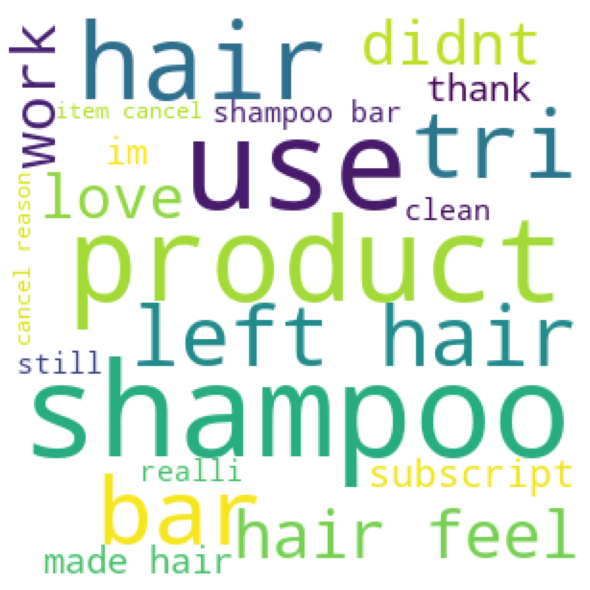

In [68]:
make_wordcloud("Shampoo")

In [69]:
#It seems like a lot of people are saying about the product/formula didn't work
shampoo = sc[sc["product_name"] == "Shampoo"]
shampoo["cancellation_reason"].value_counts()

Other reason                                                  273
The product/formula didn't work for me                        236
The product didn't work for me                                140
The formula didn't work for me                                 55
Prefer to order refills as needed (without a subscription)     48
Other                                                          45
I'm not ready for my next refill (still have plenty)           34
Product wasn't a good value                                    10
Product wasn't a good value                                     9
I didn't like the scent/flavor                                  5
The container didn't work for me                                4
I no longer use this product                                    3
This is too expensive                                           1
This was created by accident                                    1
I need it sooner                                                1
Name: canc

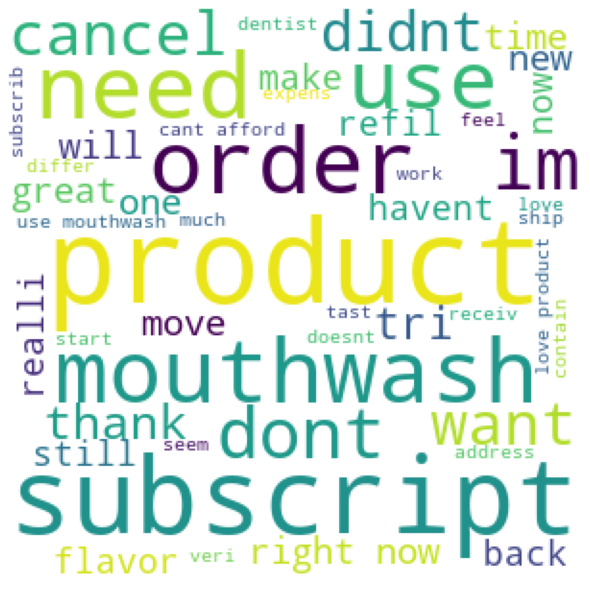

In [70]:
make_wordcloud_advance("Mouthwash", "Other reason")

## Floss

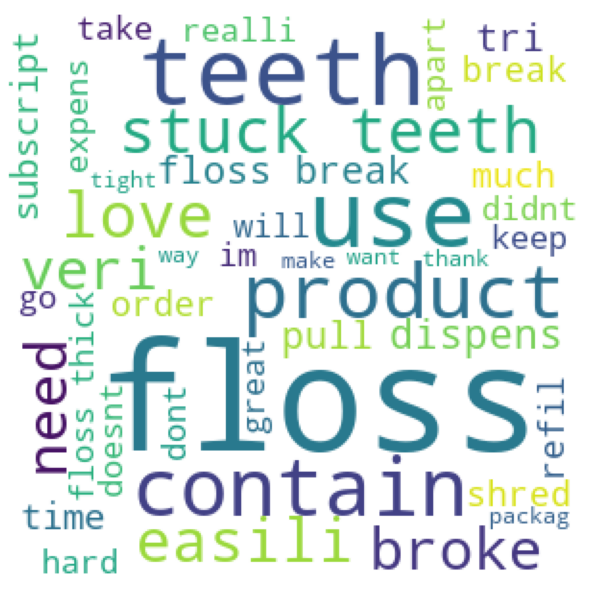

In [71]:
make_wordcloud("Floss")

In [72]:
#Most people are saying that the product didn't work for them
top_reasons("Floss")

Number of times
The product didn't work for me                                  282
Other reason                                                    166
Prefer to order refills as needed (without a su...               34
Product wasn't a good value                                      27
I'm not ready for my next refill (still have pl...               18
The formula didn't work for me                                    5
The container didn't work for me                                  3
I didn't like the scent/flavor                                    1

## Conditioner

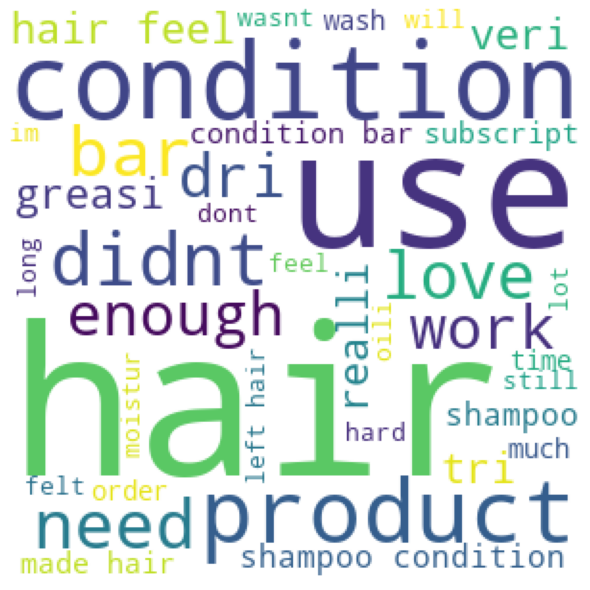

In [73]:
make_wordcloud("Conditioner")

In [74]:
top_reasons("Conditioner")

Number of times
Other reason                                                     93
The product didn't work for me                                   88
The product/formula didn't work for me                           84
The formula didn't work for me                                   40
I'm not ready for my next refill (still have pl...               28
Prefer to order refills as needed (without a su...               18
Product wasn't a good value                                       6
I didn't like the scent/flavor                                    5
Other                                                             4
The container didn't work for me                                  3
Product wasn't a good value                                       1

## Toothpaste

Number of times
The product didn't work for me                                  122
Other reason                                                     88
I didn't like the scent/flavor                                   41
Product wasn't a good value                                      15
Prefer to order refills as needed (without a su...                7
I'm not ready for my next refill (still have pl...                4

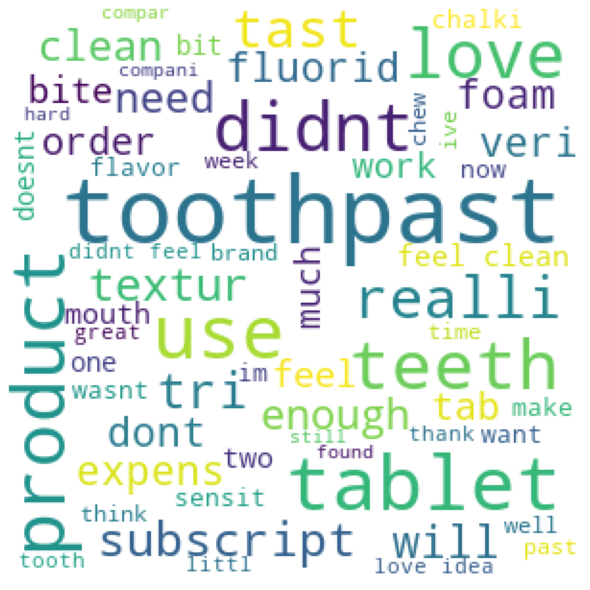

In [75]:
#It again seems like a lot of people think the product didn't work and they don't like the flavor
make_wordcloud("Toothpaste")
top_reasons("Toothpaste")

## Hand Sanitizer 8oz

Number of times
Other reason                                                    135
Prefer to order refills as needed (without a su...               35
I'm not ready for my next refill (still have pl...               33
Product wasn't a good value                                      24
The formula didn't work for me                                   11
The product/formula didn't work for me                            7
The container didn't work for me                                  6
I didn't like the scent/flavor                                    5
The product didn't work for me                                    4

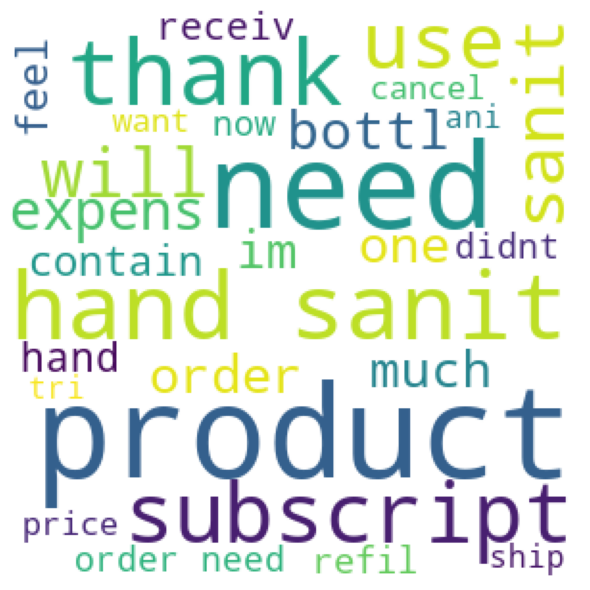

In [76]:
#People prefer to order refills
make_wordcloud('Hand Sanitizer 8oz')
top_reasons('Hand Sanitizer 8oz')

## Body Wash

Number of times
Other reason                                                    121
Product wasn't a good value                                      41
The product didn't work for me                                   24
I'm not ready for my next refill (still have pl...               18
The product/formula didn't work for me                           18
Prefer to order refills as needed (without a su...               14
The formula didn't work for me                                    8
Product wasn't a good value                                       7
Other                                                             4
I didn't like the scent/flavor                                    3

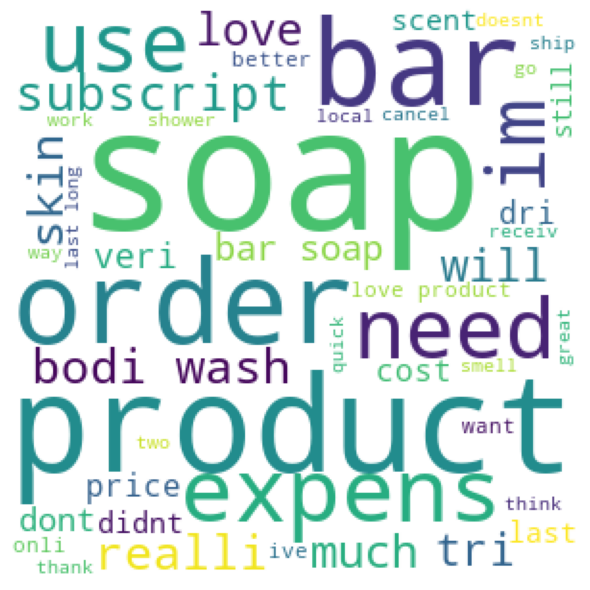

In [77]:
make_wordcloud('Body Wash')
top_reasons('Body Wash')

## Cotton Swabs

Number of times
Other reason                                                     80
I'm not ready for my next refill (still have pl...               16
Other                                                            13
Prefer to order refills as needed (without a su...               13
Product wasn't a good value                                      10
The product didn't work for me                                    6
The product/formula didn't work for me                            5
The container didn't work for me                                  2
Product wasn't a good value                                       2

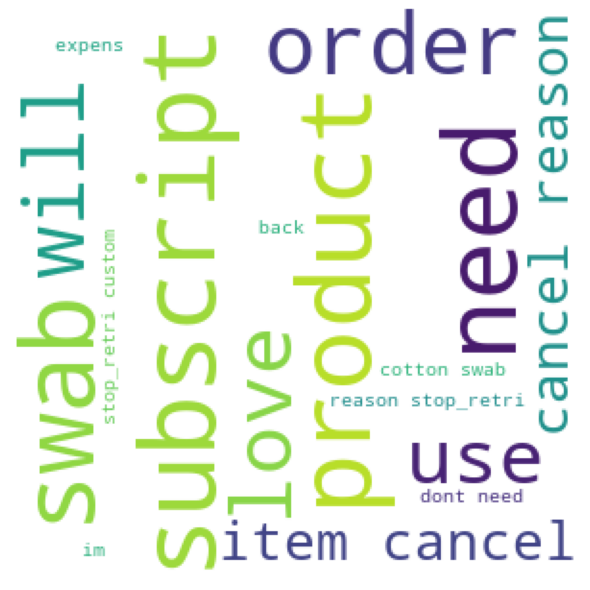

In [78]:
make_wordcloud('Cotton Swabs')
top_reasons('Cotton Swabs')

## Hand Soap

Number of times
Other reason                                                     30
Product wasn't a good value                                       9
The product/formula didn't work for me                            9
The product didn't work for me                                    8
I'm not ready for my next refill (still have pl...                4
The container didn't work for me                                  3
Prefer to order refills as needed (without a su...                1
Product wasn't a good value                                       1

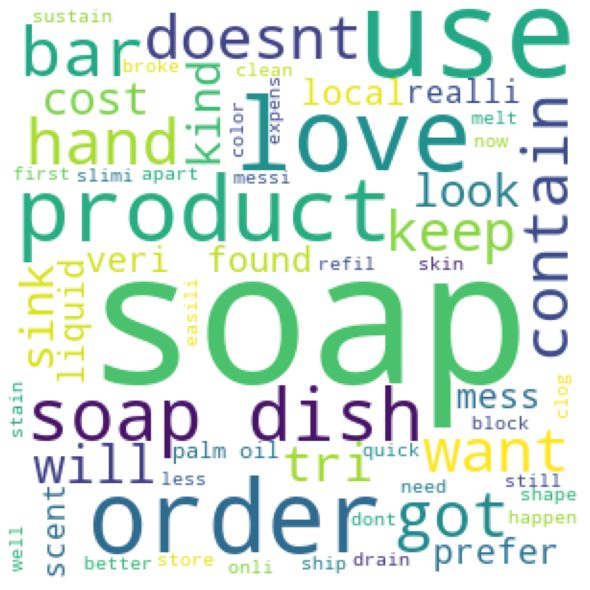

In [79]:
make_wordcloud('Hand Soap')
top_reasons('Hand Soap')

## Hand Sanitizer 2.4oz

Number of times
Other reason                                                     20
Prefer to order refills as needed (without a su...                8
I'm not ready for my next refill (still have pl...                4
The product didn't work for me                                    4
I didn't like the scent/flavor                                    1
Product wasn't a good value                                       1

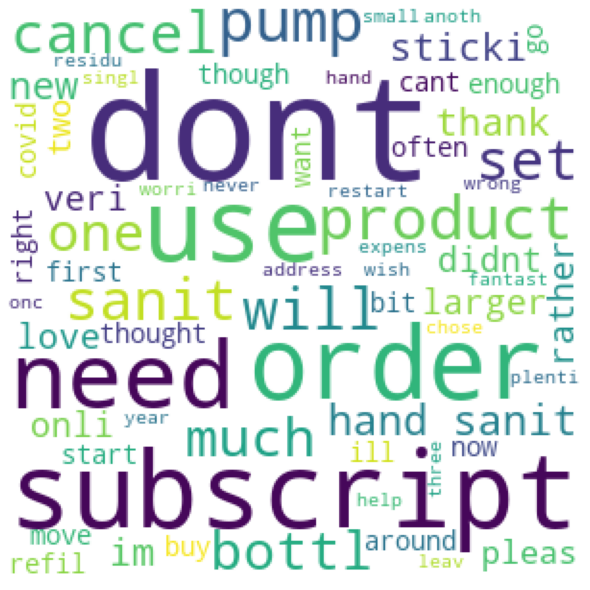

In [80]:
make_wordcloud('Hand Sanitizer 2.4oz')
top_reasons('Hand Sanitizer 2.4oz')

## Plastic Offset

Number of times
Other reason                                                     32
The product didn't work for me                                    3
Prefer to order refills as needed (without a su...                3

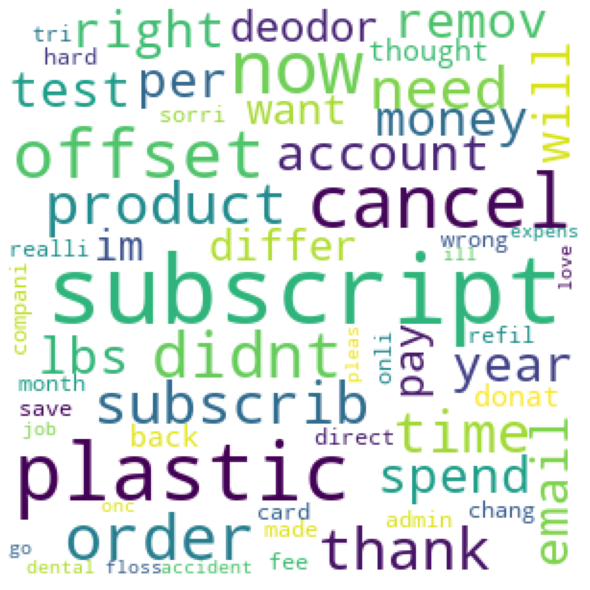

In [81]:
make_wordcloud('Plastic Offset')
top_reasons('Plastic Offset')